In [45]:
import numpy as np
import pandas as pd
import bilby
import os
import bilby.gw.result as bilby_result
import ast
import matplotlib.pyplot as plt
import ligo.skymap.plot.pp as ppplot

plt.rcParams.update({

    # --- Figure Layout ---
    "figure.figsize": (6, 4),           # Default figure size in inches
    "figure.dpi": 150,                  # DPI for crisp rendering
    "savefig.dpi": 300,                 # Higher DPI for saved figures
    "figure.autolayout": True,          # Avoids label overlap

    # --- Font & Text ---
    "font.family": "monospace",             # Or "sans-serif" for modern look
    "font.serif": ["Terminal"],  # Matches many journals
    "font.size": 10,                    # Base font size
    "axes.titlesize": 14,               # Title font size
    "axes.labelsize": 10,               # Axis label size
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 11,
    "mathtext.fontset": "dejavuserif",  # Matches the serif font

    # --- Line & Marker Styles ---
    "lines.linewidth": 1.8,
    "lines.markersize": 6,
    "lines.markeredgewidth": 0.7,

    # --- Axes ---
    "axes.linewidth": 1.0,              # Frame thickness
    "axes.labelpad": 6,                 # Padding between label and axis
    "axes.grid": True,
    "grid.alpha": 0.25,
    "grid.linestyle": "--",
    "grid.linewidth": 0.7,
    "axes.spines.top": False,           # Removes top spine
    "axes.spines.right": False,         # Removes right spine

    # --- Ticks ---
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 5,
    "ytick.major.size": 5,
    "xtick.minor.size": 3,
    "ytick.minor.size": 3,
    "xtick.top": False,
    "ytick.right": False,

    # --- Legend ---
    "legend.frameon": False,
    "legend.handlelength": 2,
    "legend.handletextpad": 0.4,
    "legend.loc": "best",

    # --- Colors and Colormaps ---
    "image.cmap": "viridis",            # Good perceptually uniform default
    "axes.prop_cycle": plt.cycler("color", [
        "#1f77b4", "#ff7f0e", "#2ca02c",
        "#d62728", "#9467bd", "#8c564b",
        "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"
    ]),
})

In [46]:
def getMeaningfulColumns(differenceDF):
    cols=[]
    for col in differenceDF:
        if differenceDF[col].isna().all():
            continue
        else:
            cols.append(col)
    return cols

def makePostInjDiffPlot(columns,differenceDF,event=False):
    nrows = int(np.ceil((len(columns))/5))
    fig,axs = plt.subplots(nrows,5,figsize=[10,2*nrows])
    if type(event)==str:
        fig.suptitle(f"{event} - Injection value for ensemble")
    else:
        fig.suptitle(f"Posterior samples - Injection for different parameters of event\n{event.label}")
    for col,ax in zip(columns,axs.flatten()):
        ax.hist(differenceDF[col],histtype='step')
        # ax.grid()
        ax.set_xlabel(col)
        ax.axvline(0,0,ax.get_ylim()[1],color='red')
        # if not (type(event)==str):
        #     ax.set_title(f"True: {}")
    for ax in axs[:,0]:
        ax.set_ylabel("Counts / bin")
    fig.tight_layout(pad=2)
    return fig,axs

def getResult(path,injectionDir="injectionFiles",injectionSuffix="_injection.dat"):
    """
    A function to read a path where the bilby_pipe run
    is stored, and return a complete CBCResult object
    """

    parentPath = "/".join(path.split("/")[:-1])
    label = path.split("/")[-1] # The label, taking the form UniformParent,uWeight_aligned_BBH_5
    # Return the final result
    readPath = os.path.join(parentPath,label,"final_result",label+"_data0_0_analysis_H1L1V1_result.hdf5")
    # print(f"ReadPath: {readPath}")
    return bilby_result.CBCResult.from_hdf5(readPath)

In [47]:
BilbyCatalogPath = "/pscratch/sd/s/seanmacb/proj411ProdRuns/testing/"

In [50]:
msk = [x.lower().startswith("testing") for x in os.listdir(BilbyCatalogPath)]
catalogs_Uniform = np.sort(np.array(os.listdir(BilbyCatalogPath))[np.array(msk)])
testingPath = [os.path.join(BilbyCatalogPath,catalogs_Uniform[3])] # This has been sub-indexed to only the u-u directory

In [51]:
testingPath

['/pscratch/sd/s/seanmacb/proj411ProdRuns/testing/testing_3']

In [52]:
for minimalPath in testingPath: # Change this line to catalogs_uniform when ready to check all dirs
    allEvents = []
    eventDirectories = os.listdir(minimalPath)
    for event in list(eventDirectories):
        try:
            allEvents.append(getResult(os.path.join(minimalPath,event)))
        except:
            print(f"Could not open {event}")
            continue

Could not open UniformParent,uWeight_aligned_BBH_8


09:36 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
09:36 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open allInis.txt


09:36 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
09:36 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open UniformParent,uWeight_aligned_BBH_45


09:36 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
09:36 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open UniformParent,uWeight_aligned_BBH_5


09:36 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
09:36 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
09:36 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
09:36 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,uWeight_aligned_BBH_4
Could not open testRun.sh


09:36 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
09:36 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
09:36 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open UniformParent,uWeight_aligned_BBH_6


09:36 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
09:36 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
09:36 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
09:36 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open iniFiles


09:36 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
09:36 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
09:36 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open UniformParent,uWeight_precessing_BBH_0
Could not open UniformParent,uWeight_aligned_BBH_44


09:36 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
09:36 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
09:36 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open UniformParent,uWeight_aligned_BBH_7
Could not open injectionFiles
Could not open UniformParent,uWeight_precessing_BBH_1


09:36 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open UniformParent,uWeight_aligned_BBH_9


In [54]:
len(allEvents)

40

09:37 bilby INFO    : Key: KS-test p-value
09:37 bilby INFO    : mass_ratio: 0.03600708374141015
09:37 bilby INFO    : chirp_mass: 0.8566009876467751
09:37 bilby INFO    : luminosity_distance: 0.41290359259286447
09:37 bilby INFO    : dec: 0.7080236608426583
09:37 bilby INFO    : ra: 0.5592998877536027
09:37 bilby INFO    : chi_1: 0.16892081614153764
09:37 bilby INFO    : chi_2: 0.020409890382472096
09:37 bilby INFO    : psi: 0.36038402809507897
09:37 bilby INFO    : phase: 0.26924964450962463
09:37 bilby INFO    : theta_jn: 0.6500601694924464
09:37 bilby INFO    : geocent_time: 0.159461900735548
09:37 bilby INFO    : Combined p-value: 0.09372154452043757
09:37 bilby INFO    : Key: KS-test p-value
09:37 bilby INFO    : luminosity_distance: 0.41290359259286447
09:37 bilby INFO    : chirp_mass: 0.8566009876467751
09:37 bilby INFO    : Combined p-value: 0.7212959714381512


CPU times: user 1.1 s, sys: 24.2 ms, total: 1.13 s
Wall time: 1.15 s


(<Figure size 900x600 with 1 Axes>,
 pvals(combined_pvalue=np.float64(0.7212959714381512), pvalues=[np.float64(0.41290359259286447), np.float64(0.8566009876467751)], names=['luminosity_distance', 'chirp_mass']))

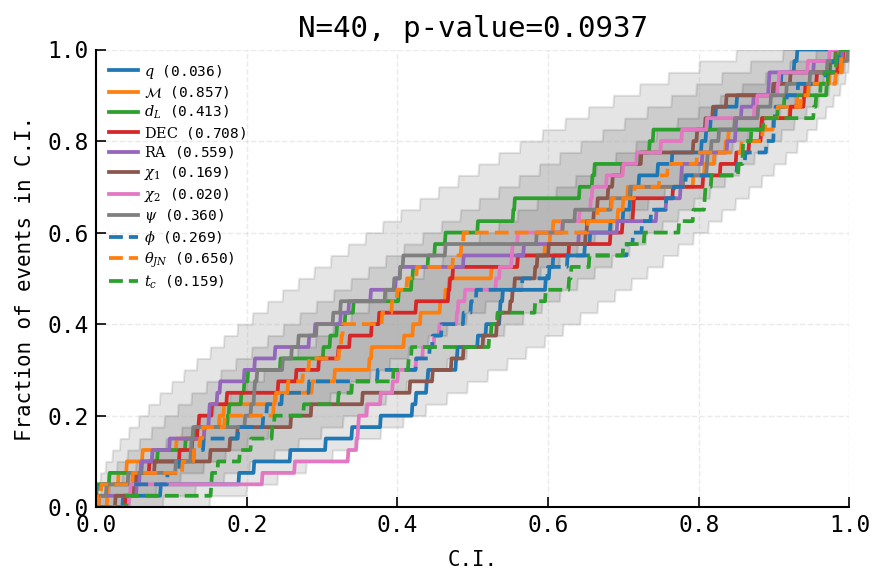

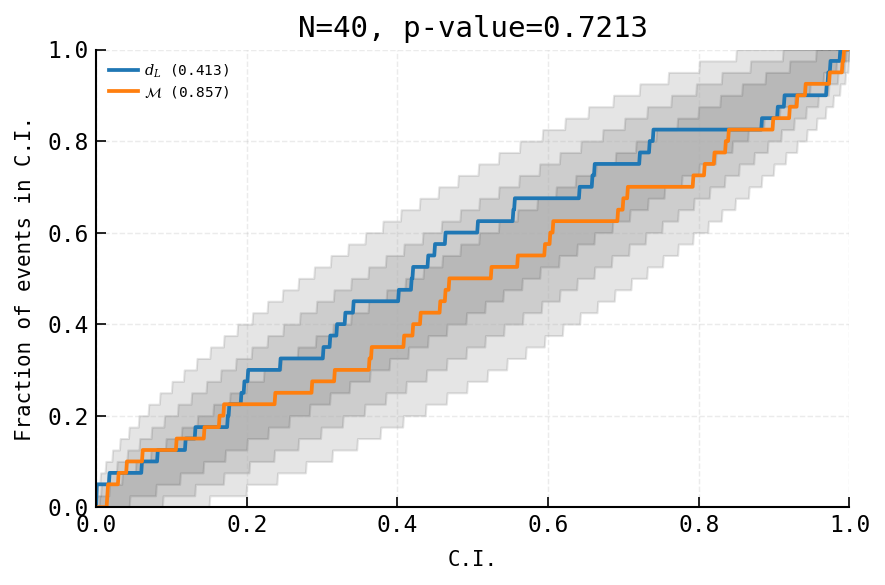

In [56]:
%%time 
bilby.core.result.make_pp_plot(allEvents, filename='pp_testing_3.png',)
bilby.core.result.make_pp_plot(allEvents, filename='pp_testing_3_inset.png',keys=["luminosity_distance","chirp_mass"])

In [57]:
p1 = allEvents[0].priors.keys()
p2 = allEvents[1].priors.keys()
set1,set2=[],[]
for ev in allEvents:
    if ev.priors.keys()==p1:
        set1.append(ev)
    else:
        set2.append(ev)

10:02 bilby INFO    : Key: KS-test p-value
10:02 bilby INFO    : mass_ratio: 0.03600708374141015
10:02 bilby INFO    : chirp_mass: 0.8566009876467751
10:02 bilby INFO    : luminosity_distance: 0.41290359259286447
10:02 bilby INFO    : dec: 0.7080236608426583
10:02 bilby INFO    : ra: 0.5592998877536027
10:02 bilby INFO    : chi_1: 0.16892081614153764
10:02 bilby INFO    : chi_2: 0.020409890382472096
10:02 bilby INFO    : psi: 0.36038402809507897
10:02 bilby INFO    : phase: 0.26924964450962463
10:02 bilby INFO    : theta_jn: 0.6500601694924464
10:02 bilby INFO    : geocent_time: 0.159461900735548
10:02 bilby INFO    : Combined p-value: 0.09372154452043757


CPU times: user 754 ms, sys: 15.2 ms, total: 769 ms
Wall time: 775 ms


(<Figure size 900x600 with 1 Axes>,
 pvals(combined_pvalue=np.float64(0.09372154452043757), pvalues=[np.float64(0.03600708374141015), np.float64(0.8566009876467751), np.float64(0.41290359259286447), np.float64(0.7080236608426583), np.float64(0.5592998877536027), np.float64(0.16892081614153764), np.float64(0.020409890382472096), np.float64(0.36038402809507897), np.float64(0.26924964450962463), np.float64(0.6500601694924464), np.float64(0.159461900735548)], names=['mass_ratio', 'chirp_mass', 'luminosity_distance', 'dec', 'ra', 'chi_1', 'chi_2', 'psi', 'phase', 'theta_jn', 'geocent_time']))

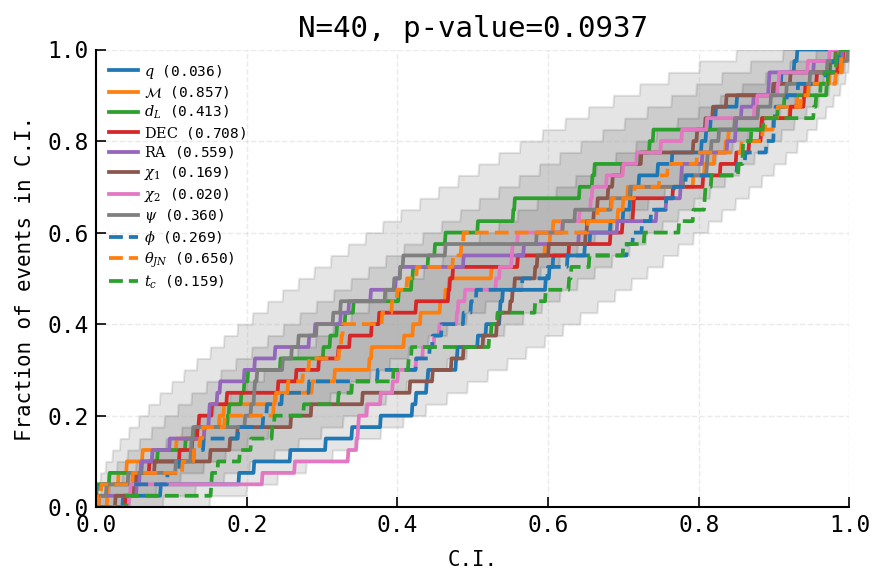

In [69]:
%%time 
bilby.core.result.make_pp_plot(set1, filename='pp_testing_3_1.png',confidence_interval=[0.68,0.95,0.997])

In [59]:
%%time 
bilby.core.result.make_pp_plot(set2, filename="pp_testing_3_1.png",confidence_interval=[0.68,0.95,0.997,0.999936, 	0.999999426])

CPU times: user 229 μs, sys: 0 ns, total: 229 μs
Wall time: 232 μs


IndexError: list index out of range

In [63]:
u_stellar = [os.path.join(BilbyCatalogPath,catalogs_Uniform[4])] # This has been sub-indexed to only the u-u directory

In [64]:
u_stellar

['/pscratch/sd/s/seanmacb/proj411ProdRuns/testing/testing_4']

In [65]:
for minimalPath in u_stellar: # Change this line to catalogs_uniform when ready to check all dirs
    allEvents_stellar = []
    eventDirectories = os.listdir(minimalPath)
    for event in list(eventDirectories):
        try:
            allEvents_stellar.append(getResult(os.path.join(minimalPath,event)))
        except:
            print(f"Could not open {event}")
            continue

09:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open UniformParent,uWeight_aligned_BBH_8
Could not open UniformParent,uWeight_aligned_BBH_20
Could not open allInis.txt
Could not open UniformParent,uWeight_aligned_BBH_23
Could not open UniformParent,uWeight_aligned_BBH_16
Could not open UniformParent,uWeight_aligned_BBH_1


09:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
09:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open UniformParent,uWeight_precessing_BBH_17
Could not open UniformParent,uWeight_precessing_BBH_11
Could not open UniformParent,uWeight_aligned_BBH_2
Could not open UniformParent,uWeight_aligned_BBH_13
Could not open UniformParent,uWeight_aligned_BBH_26
Could not open UniformParent,uWeight_precessing_BBH_16
Could not open UniformParent,uWeight_precessing_BBH_14
Could not open UniformParent,uWeight_precessing_BBH_12
Could not open UniformParent,uWeight_aligned_BBH_21
Could not open UniformParent,uWeight_precessing_BBH_4
Could not open UniformParent,uWeight_aligned_BBH_24
Could not open UniformParent,uWeight_aligned_BBH_27
Could not open UniformParent,uWeight_precessing_BBH_8
Could not open UniformParent,uWeight_precessing_BBH_6
Could not open UniformParent,uWeight_aligned_BBH_11
Could not open UniformParent,uWeight_aligned_BBH_4
Could not open testRun.sh
Could not open UniformParent,uWeight_aligned_BBH_18
Could not open UniformParent,uWeight_aligned_BBH_10
Could not open Unif

09:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
09:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open UniformParent,uWeight_precessing_BBH_13
Could not open UniformParent,uWeight_aligned_BBH_14
Could not open UniformParent,uWeight_aligned_BBH_19
Could not open UniformParent,uWeight_aligned_BBH_17
Could not open UniformParent,uWeight_aligned_BBH_0
Could not open iniFiles


09:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
09:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open UniformParent,uWeight_precessing_BBH_15
Could not open UniformParent,uWeight_precessing_BBH_2
Could not open UniformParent,uWeight_aligned_BBH_12
Could not open UniformParent,uWeight_precessing_BBH_0
Could not open UniformParent,uWeight_aligned_BBH_7
Could not open UniformParent,uWeight_precessing_BBH_21
Could not open UniformParent,uWeight_precessing_BBH_10
Could not open injectionFiles
Could not open UniformParent,uWeight_precessing_BBH_19


09:42 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open UniformParent,uWeight_precessing_BBH_1
Could not open iniSub.log
Could not open UniformParent,uWeight_aligned_BBH_9


In [66]:
len(allEvents_stellar)

8

09:43 bilby INFO    : Key: KS-test p-value
09:43 bilby INFO    : mass_ratio: 0.23478985230036453
09:43 bilby INFO    : chirp_mass: 0.008501119495922119
09:43 bilby INFO    : luminosity_distance: 0.3312872270483549
09:43 bilby INFO    : dec: 0.7277665301127001
09:43 bilby INFO    : ra: 0.9703709888389163
09:43 bilby INFO    : a_1: 0.9623563790924002
09:43 bilby INFO    : a_2: 0.6409061315151451
09:43 bilby INFO    : psi: 0.05380873147644061
09:43 bilby INFO    : phase: 0.2934337447883558
09:43 bilby INFO    : theta_jn: 0.4290907340346385
09:43 bilby INFO    : phi_12: 0.09095695485650501
09:43 bilby INFO    : phi_jl: 0.16157627105712902
09:43 bilby INFO    : tilt_1: 0.043289090294091004
09:43 bilby INFO    : tilt_2: 0.11266604092585841
09:43 bilby INFO    : geocent_time: 0.34859500803163124
09:43 bilby INFO    : Combined p-value: 0.022283823943323712
09:43 bilby INFO    : Key: KS-test p-value
09:43 bilby INFO    : luminosity_distance: 0.3312872270483549
09:43 bilby INFO    : chirp_mass: 

CPU times: user 1.22 s, sys: 225 ms, total: 1.44 s
Wall time: 1.95 s


(<Figure size 900x600 with 1 Axes>,
 pvals(combined_pvalue=np.float64(0.019354618931469485), pvalues=[np.float64(0.3312872270483549), np.float64(0.008501119495922119)], names=['luminosity_distance', 'chirp_mass']))

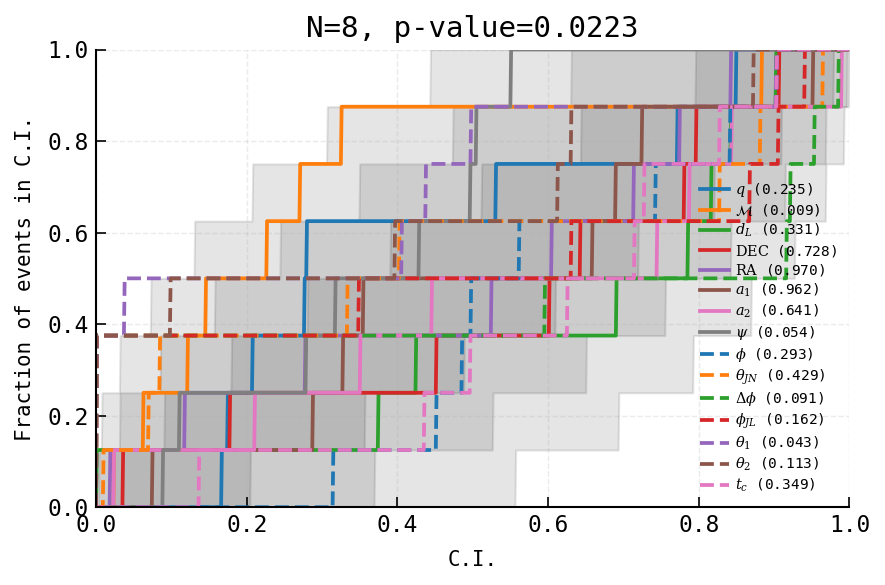

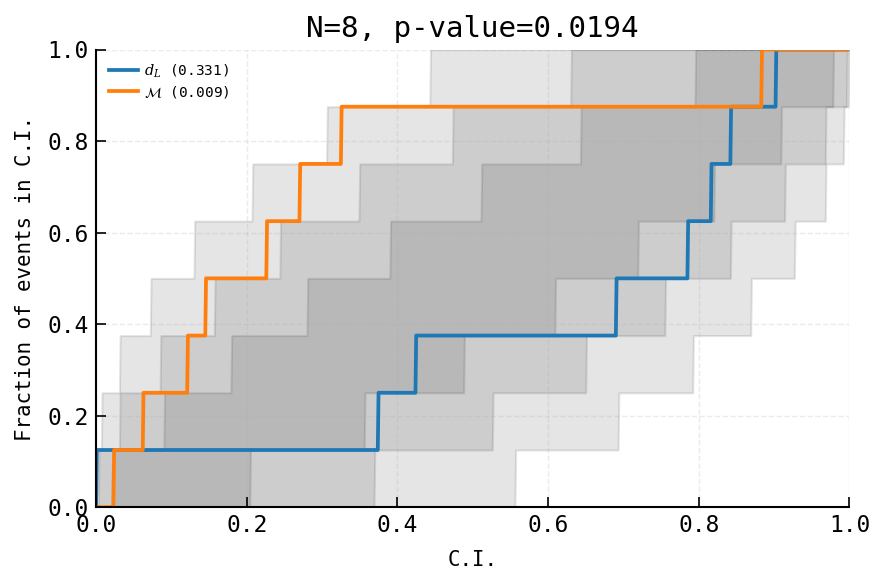

In [67]:
%%time 
# bilby.core.result.make_pp_plot(allEvents_stellar, filename='pp_testing_1.png')
bilby.core.result.make_pp_plot(allEvents_stellar, filename='pp_testing_4.png')
bilby.core.result.make_pp_plot(allEvents_stellar, filename='pp_testing_4_chirp_dL_only.png',keys=["luminosity_distance","chirp_mass"])

17:38 bilby INFO    : Key: KS-test p-value
17:38 bilby INFO    : mass_ratio: 0.15627417612282934
17:38 bilby INFO    : chirp_mass: 1.2349629283725417e-08
17:38 bilby INFO    : luminosity_distance: 0.00019878151603822702
17:38 bilby INFO    : dec: 0.14403051174203355
17:38 bilby INFO    : ra: 0.4175502259598377
17:38 bilby INFO    : chi_1: 0.6698361733739495
17:38 bilby INFO    : chi_2: 0.5765878213041322
17:38 bilby INFO    : psi: 0.9257546250882915
17:38 bilby INFO    : phase: 0.4662789141594351
17:38 bilby INFO    : theta_jn: 0.34933373226972836
17:38 bilby INFO    : geocent_time: 0.3699011801425003
17:38 bilby INFO    : Combined p-value: 5.565911159446078e-07
17:38 bilby INFO    : Key: KS-test p-value
17:38 bilby INFO    : mass_ratio: 0.7401049065293881
17:38 bilby INFO    : chirp_mass: 1.6991377408964506e-09
17:38 bilby INFO    : luminosity_distance: 1.4071584414162796e-08
17:38 bilby INFO    : dec: 0.036773749702318836
17:38 bilby INFO    : ra: 0.24244516030102448
17:38 bilby INFO

CPU times: user 3.41 s, sys: 108 ms, total: 3.52 s
Wall time: 3.52 s


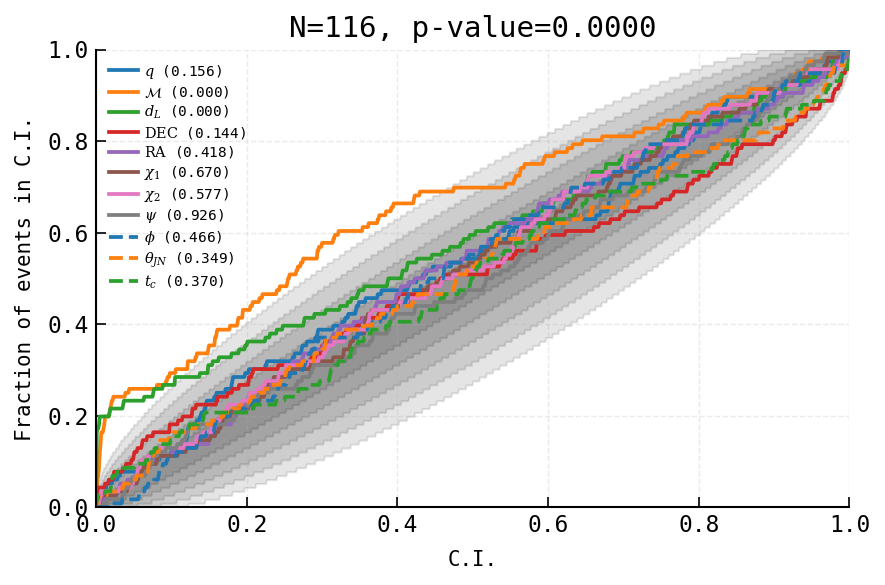

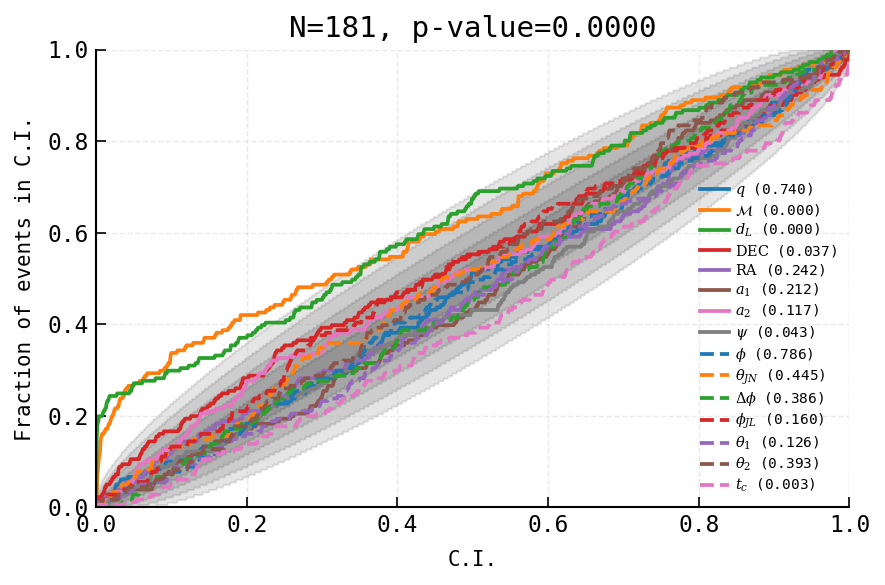

In [202]:
%%time 
fig, p = bilby.core.result.make_pp_plot(set1_stellar, filename='pp1_stellar.png',confidence_interval=[0.68,0.95,0.997,0.999936, 	0.999999426])
fig, p = bilby.core.result.make_pp_plot(set2_stellar, filename='pp2_stellar.png',confidence_interval=[0.68,0.95,0.997,0.999936, 	0.999999426])

In [32]:
snrs1 = []
dL1 = []
chirp1 = []
for inj in set1_stellar:
    inp = inj.injection_parameters
    snr1 = 0
    for k in ["H1_optimal_snr","L1_optimal_snr","V1_optimal_snr"]:
        snr1+=inp[k]**2
    dL1.append(inp['luminosity_distance'])
    snrs1.append(np.sqrt(snr1))
    chirp1.append(inp['chirp_mass'])
    

snrs2 = []
dL2 = []
chirp2 = []

for inj in set2_stellar:
    inp = inj.injection_parameters
    snr2 = 0
    for k in ["H1_optimal_snr","L1_optimal_snr","V1_optimal_snr"]:
        snr2+=inp[k]**2
    dL2.append(inp['luminosity_distance'])
    snrs2.append(np.sqrt(snr2))
    chirp2.append(inp['chirp_mass'])

snrsAll = snrs1
dLAll = dL1
chirpAll = chirp1

for s,d,c in zip(snrs2,dL2,chirp2):
    snrsAll.append(s)
    dLAll.append(d)
    chirpAll.append(c)

(array([14., 24.,  5.,  5.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30., 33., 36.,
        39., 42., 45., 48., 51., 54., 57., 60., 63., 66., 69., 72.]),
 <BarContainer object of 24 artists>)

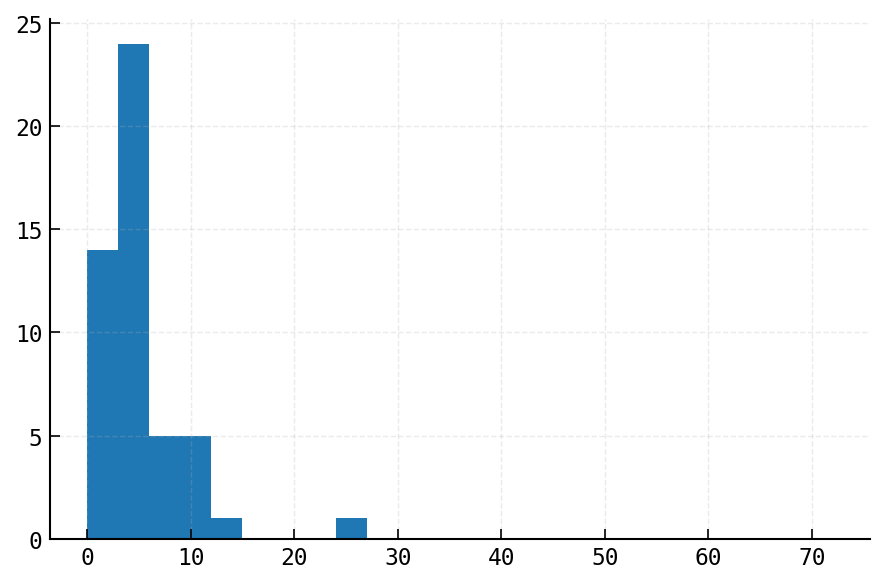

In [34]:
plt.hist(snrs1,bins=np.arange(0,75,step=3))

(array([ 4., 21., 22., 13., 18., 12., 11.,  3.,  6.,  3.,  0.,  2.,  1.]),
 array([   0.,  750., 1500., 2250., 3000., 3750., 4500., 5250., 6000.,
        6750., 7500., 8250., 9000., 9750.]),
 <BarContainer object of 13 artists>)

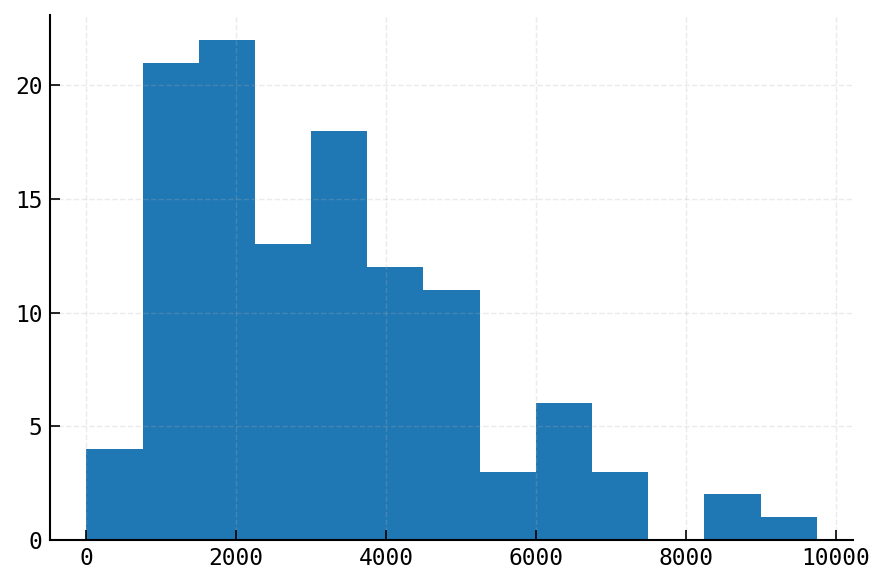

In [245]:
plt.hist(dL,bins=np.arange(0,10001,step=750))

In [35]:
np.nanpercentile(dLAll,80),np.nanpercentile(dLAll,20)

(np.float64(14749.516349774014), np.float64(3315.609798489007))

In [41]:
subselection1 = []
subselection2 = []
dL1 = []
dL2 = []
churp1 = []
churp2 = []
for s in allEvents:
    inp = s.injection_parameters
    snr = 0
    for k in ["H1_optimal_snr","L1_optimal_snr","V1_optimal_snr"]:
        snr+=inp[k]**2
    if np.sqrt(snr)>np.nanpercentile(snrsAll,80):
        subselection1.append(s)
    else:
        subselection2.append(s)
    if inp["luminosity_distance"]>np.nanpercentile(dLAll,80):
        dL1.append(s)
    else:
        dL2.append(s)

    if inp["chirp_mass"]>np.nanpercentile(chirpAll,80):
        churp1.append(s)
    else:
        churp2.append(s)


# subselec2 = []
# for c in set2_stellar:
#     inp = c.injection_parameters
#     snr = 0
#     for k in ["H1_optimal_snr","L1_optimal_snr","V1_optimal_snr"]:
#         snr+=inp[k]**2
#     if np.sqrt(snr)>np.nanpercentile(snrs2,80):
#         subselec2.append(c)

# for e in subselec2:
#     subselec1.append(e)
# # subselec1 = np.array(subselec1).flatten()

In [44]:
np.nanpercentile(snrsAll,80)

np.float64(7.277801826321685)

Text(0, 0.5, 'Recovered chirp_mass')

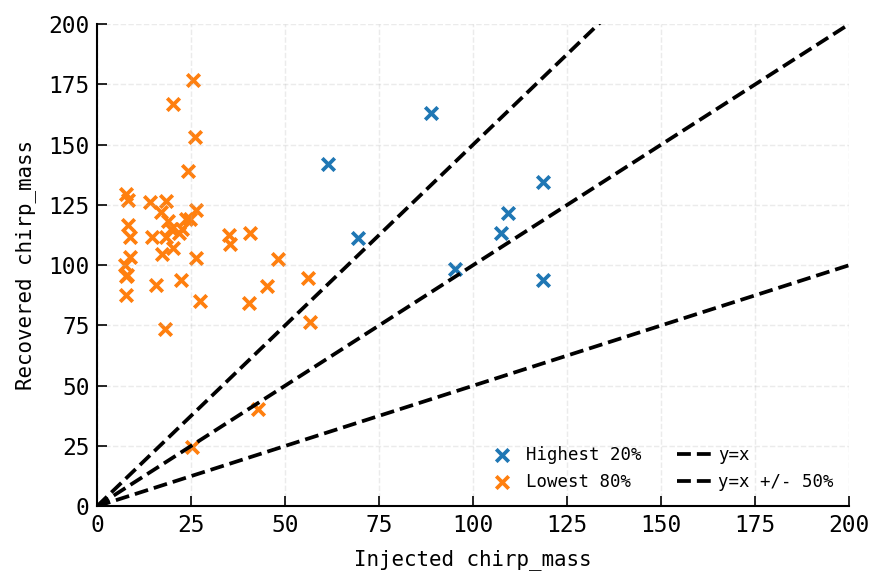

In [42]:
key='chirp_mass'
for ch,lbl in zip([churp1,churp2],["Highest 20%","Lowest 80%"]):
    medianRecov = []
    injectio = []
    for ev in ch:
        medianRecov.append(np.median(ev.posterior[key]))
        injectio.append(ev.injection_parameters[key])
    plt.scatter(injectio,medianRecov,label=lbl,marker='x')
plt.plot([0,250],[0,250],ls='--',color='black',label="y=x")
plt.plot(np.array([0,250]),np.array([0,250])*1.5,ls='--',color='black',label="y=x +/- 50%")
plt.plot(np.array([0,250]),np.array([0,250])*0.5,ls='--',color='black')
plt.legend(ncols=2,fontsize='small',loc="lower right")

plt.xlim(0,200)
plt.ylim(0,200)

plt.xlabel(f"Injected {key}")
plt.ylabel(f"Recovered {key}")

Text(0, 0.5, 'Recovered luminosity_distance')

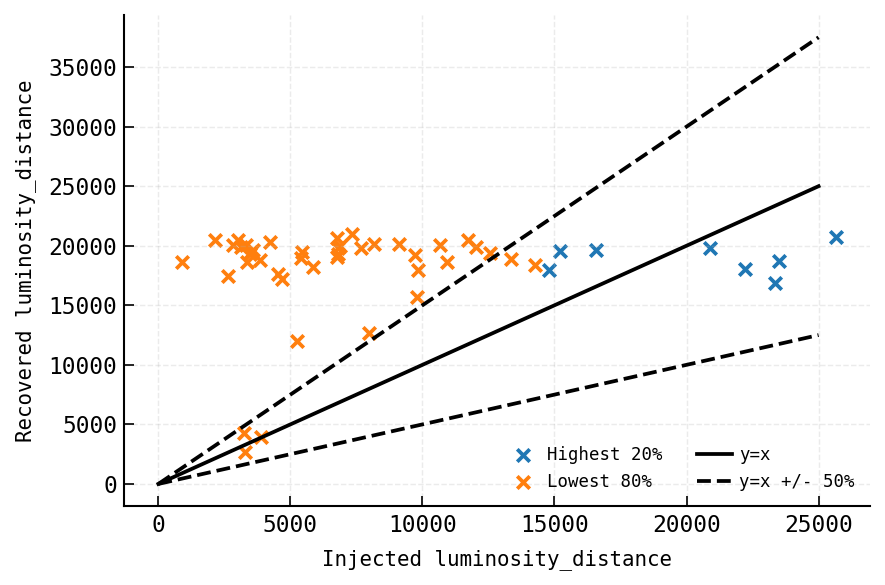

In [43]:
key='luminosity_distance'
for ch,lbl in zip([dL1,dL2],["Highest 20%","Lowest 80%"]):
    medianRecov = []
    injectio = []
    for ev in ch:
        medianRecov.append(np.median(ev.posterior[key]))
        injectio.append(ev.injection_parameters[key])
    plt.scatter(injectio,medianRecov,label=lbl,marker='x')

plt.plot([0,25000],[0,25000],ls='-',color='black',label="y=x")
plt.plot(np.array([0,25000]),np.array([0,25000])*1.5,ls='--',color='black',label="y=x +/- 50%")
plt.plot(np.array([0,25000]),np.array([0,25000])*0.5,ls='--',color='black')
plt.legend(ncols=2,fontsize='small',loc="lower right")
plt.xlabel(f"Injected {key}")
plt.ylabel(f"Recovered {key}")

12:12 bilby INFO    : Key: KS-test p-value
12:12 bilby INFO    : chirp_mass: 0.10738889205224289
12:12 bilby INFO    : luminosity_distance: 0.05750301843173278
12:12 bilby INFO    : Combined p-value: 0.03758968986951182
12:12 bilby INFO    : Key: KS-test p-value
12:12 bilby INFO    : chirp_mass: 1.0075864849496047e-15
12:12 bilby INFO    : luminosity_distance: 4.461736626984959e-16
12:12 bilby INFO    : Combined p-value: 3.1863380388192266e-29
12:12 bilby INFO    : Key: KS-test p-value
12:12 bilby INFO    : chirp_mass: 0.21032482158475319
12:12 bilby INFO    : luminosity_distance: 0.7491417514922214
12:12 bilby INFO    : Combined p-value: 0.44872857339030414
12:12 bilby INFO    : Key: KS-test p-value
12:12 bilby INFO    : chirp_mass: 1.4096890723951324e-15
12:12 bilby INFO    : luminosity_distance: 1.222765931312784e-14
12:12 bilby INFO    : Combined p-value: 1.158865129361619e-27


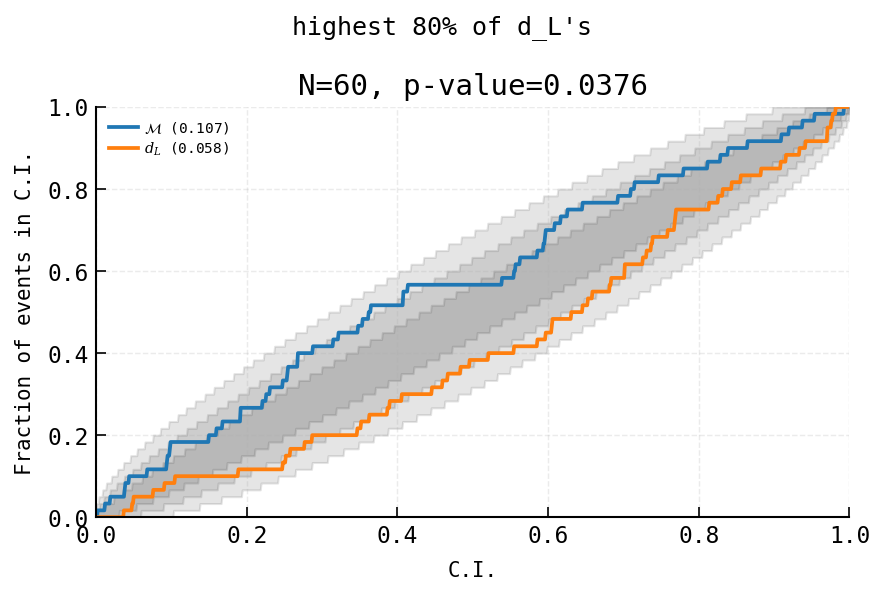

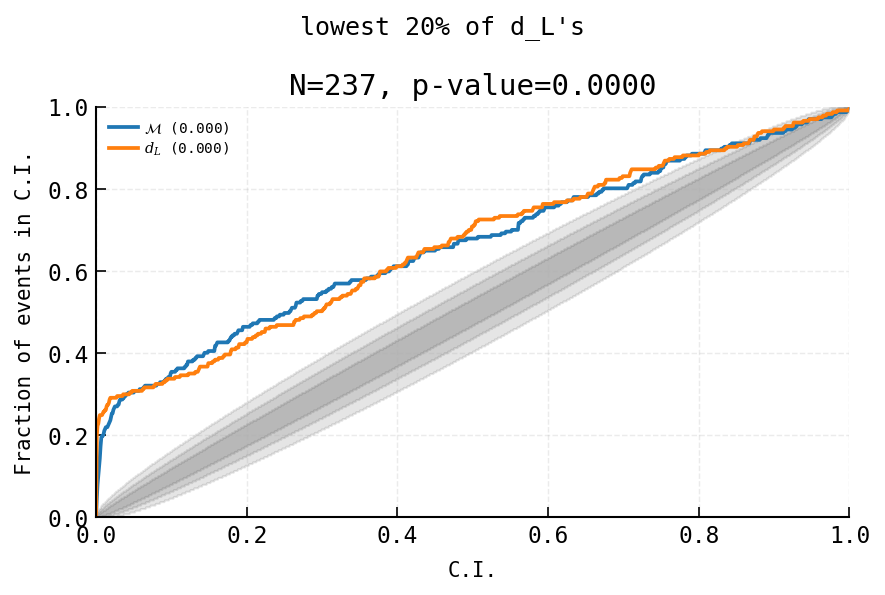

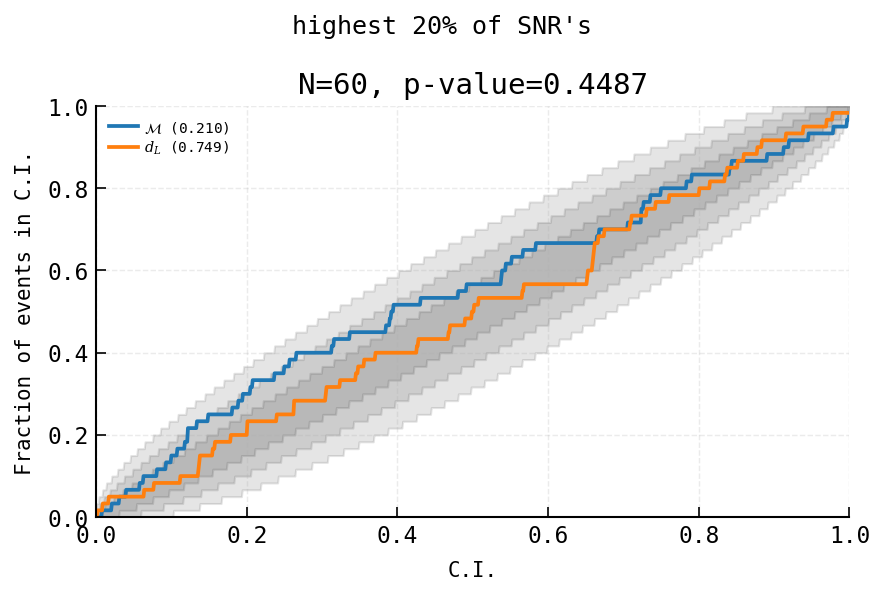

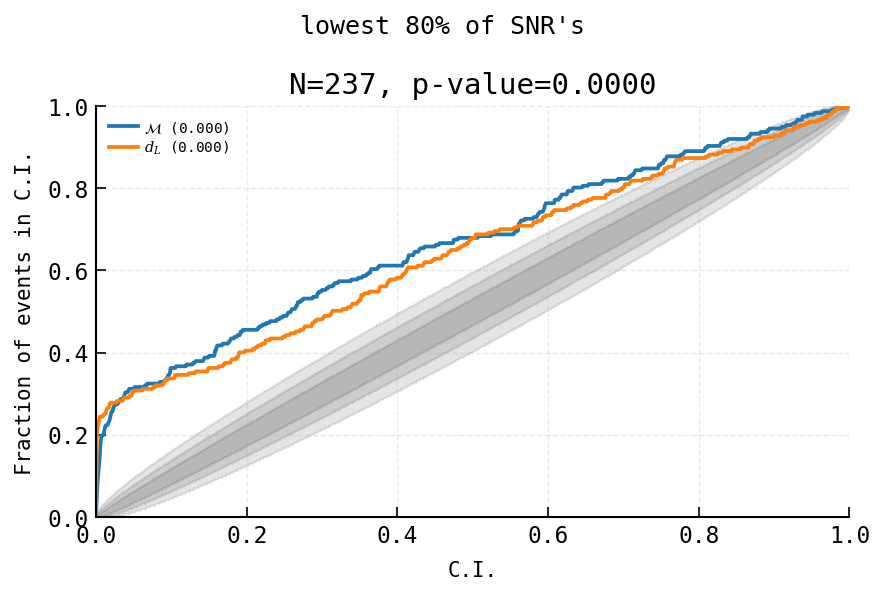

In [358]:
fig, p = bilby.core.result.make_pp_plot(dL1, save=False,keys=["chirp_mass","luminosity_distance"])
fig.suptitle("highest 80% of d_L's")
fig.tight_layout()
fig, p = bilby.core.result.make_pp_plot(dL2, save=False,keys=["chirp_mass","luminosity_distance"])
fig.suptitle("lowest 20% of d_L's")
fig.tight_layout()
fig, p = bilby.core.result.make_pp_plot(subselection1, save=False,keys=["chirp_mass","luminosity_distance"])
fig.suptitle("highest 20% of SNR's")
fig.tight_layout()
fig, p = bilby.core.result.make_pp_plot(subselection2, save=False,keys=["chirp_mass","luminosity_distance"])
fig.suptitle("lowest 80% of SNR's")
fig.tight_layout()
# fig, p = bilby.core.result.make_pp_plot(subselec2, save=False,keys=["chirp_mass","luminosity_distance"])

12:00 bilby INFO    : Key: KS-test p-value
12:00 bilby INFO    : mass_ratio: 0.6884405505006324
12:00 bilby INFO    : chirp_mass: 2.097168739130058e-14
12:00 bilby INFO    : luminosity_distance: 2.0408849732217747e-12
12:00 bilby INFO    : dec: 0.018383930270268155
12:00 bilby INFO    : ra: 0.8880852445282954
12:00 bilby INFO    : psi: 0.08964323457893575
12:00 bilby INFO    : phase: 0.8168308349073755
12:00 bilby INFO    : theta_jn: 0.12603351864740953
12:00 bilby INFO    : geocent_time: 0.024204445882342496
12:00 bilby INFO    : Combined p-value: 2.0029962278828686e-21


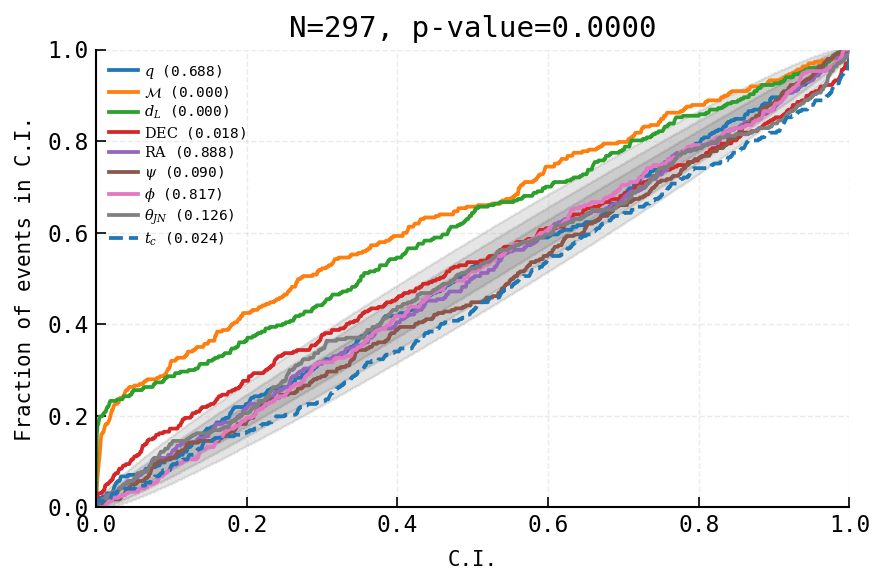

In [332]:
fig, p = bilby.core.result.make_pp_plot(allEvents_stellar, save=False,keys=np.array(["mass_ratio","chirp_mass","luminosity_distance","dec","ra","psi","phase","theta_jn","geocent_time"]))

18:01 bilby INFO    : Key: KS-test p-value
18:01 bilby INFO    : chirp_mass: 1.6991377408964506e-09
18:01 bilby INFO    : luminosity_distance: 1.4071584414162796e-08
18:01 bilby INFO    : Combined p-value: 9.389823023198333e-16


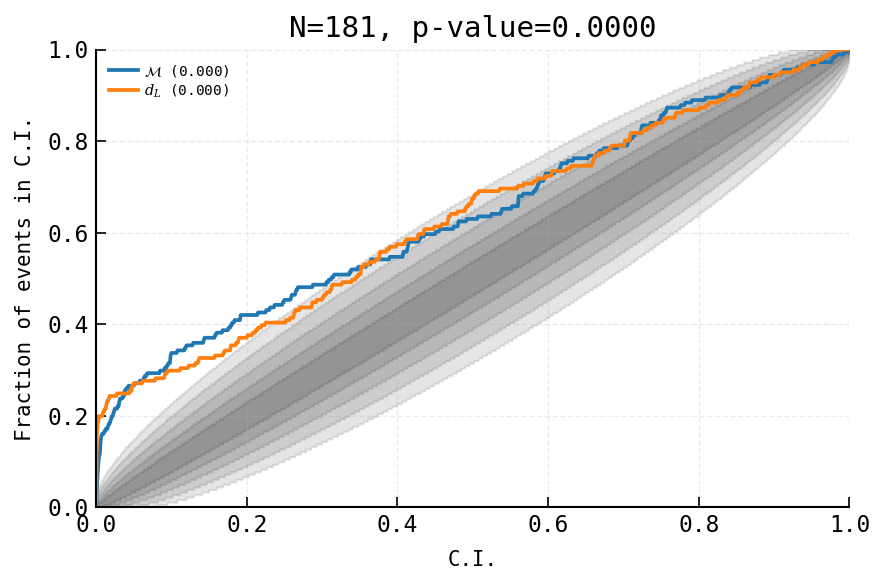

Signature:
bilby.core.result.make_pp_plot(
    results,
    filename=None,
    save=True,
    confidence_interval=[0.68, 0.95, 0.997],
    lines=None,
    legend_fontsize='x-small',
    keys=None,
    title=True,
    confidence_interval_alpha=0.1,
    weight_list=None,
    **kwargs,
)
Docstring:
Make a P-P plot for a set of runs with injected signals.

Parameters
results: list
    A list of Result objects, each of these should have injected_parameters
filename: str, optional
    The name of the file to save, the default is "outdir/pp.png"
save: bool, optional
    Whether to save the file, default=True
confidence_interval: (float, list), optional
    The confidence interval to be plotted, defaulting to 1-2-3 sigma
lines: list
    If given, a list of matplotlib line formats to use, must be greater
    than the number of parameters.
legend_fontsize: float
    The font size for the legend
keys: list
    A list of keys to use, if None defaults to search_parameter_keys
title: bool
    Whethe

In [223]:
fig, p = bilby.core.result.make_pp_plot(set2_stellar, save=False,keys=["chirp_mass","luminosity_distance"],confidence_interval=[0.68,0.95,0.997,0.999936, 	0.999999426])

In [119]:
u_u = [os.path.join(BilbyCatalogPath,catalogs_Uniform[3])] # This has been sub-indexed to only the u-u directory

for minimalPath in u_u: # Change this line to catalogs_uniform when ready to check all dirs
    allEvents_u = []
    eventDirectories = os.listdir(minimalPath)
    for event in list(eventDirectories):
        try:
            allEvents_u.append(getResult(os.path.join(minimalPath,event)))
        except:
            print(f"Could not open {event}")
            continue

17:01 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:01 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:01 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:01 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,uWeight_aligned_NSBH_4


17:01 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:01 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:01 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:01 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,uWeight_aligned_NSBH_5


17:01 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:01 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:01 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:01 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,uWeight_precessing_NSBH_1


17:01 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:01 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:01 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:01 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,uWeight_precessing_NSBH_3


17:01 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:02 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open UniformParent,uWeight_aligned_NSBH_3
Could not open allAligned.txt


17:02 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:02 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:02 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:02 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open allNSBHs.txt


17:02 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:02 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:02 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:02 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open testRun.sh


17:02 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:02 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:02 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:02 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open allPrecessing.txt


17:02 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:02 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:02 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:02 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open nsbh_sub_0.out


17:02 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:02 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:02 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:02 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,uWeight_aligned_NSBH_2


17:02 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:02 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open iniFiles


17:02 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:02 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:02 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:02 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,uWeight_aligned_NSBH_0


17:02 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:02 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:02 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:02 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,uWeight_precessing_NSBH_0


17:02 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:02 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:02 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:02 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open UniformParent,uWeight_aligned_NSBH_1
Could not open UniformParent,uWeight_precessing_NSBH_2


17:02 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:02 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:02 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:02 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open injectionFiles


17:02 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:02 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:02 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:02 bilby INFO    : Global meta data was removed from the result object for compatibility

Could not open alignedSubmission.out


17:02 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:02 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:02 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
17:02 bilby INFO    : Global meta data was removed from the result object for compatibility

In [130]:
# p1 = allEvents_u[0].priors.keys()
# p2 = allEvents_u[1].priors.keys()
# set1_u,set2_u=[],[]
# for ev in allEvents_stellar:
#     if ev.priors.keys()==p1:
#         set1_stellar.append(ev)
#     else:
#         set2_stellar.append(ev)

In [129]:
# p1 = allEvents_u[0].priors.keys()
# for k,r in zip(allEvents_u,range(len(allEvents_u))):
#     if k.priors.keys() != p1:
#         print(r)        


17:07 bilby INFO    : Key: KS-test p-value
17:07 bilby INFO    : mass_ratio: 0.7353021106547704
17:07 bilby INFO    : chirp_mass: 0.019421444176674497
17:07 bilby INFO    : luminosity_distance: 0.11218129758885755
17:07 bilby INFO    : dec: 0.8718542581814699
17:07 bilby INFO    : ra: 0.4906356521316705
17:07 bilby INFO    : chi_1: 0.36260768278833583
17:07 bilby INFO    : chi_2: 0.9669557363744705
17:07 bilby INFO    : psi: 0.08275541243954516
17:07 bilby INFO    : phase: 0.4956056522864265
17:07 bilby INFO    : theta_jn: 0.2703656376778332
17:07 bilby INFO    : geocent_time: 0.11933631219788801
17:07 bilby INFO    : Combined p-value: 0.12035567917105518


CPU times: user 1.31 s, sys: 15.7 ms, total: 1.32 s
Wall time: 1.34 s


(<Figure size 900x600 with 1 Axes>,
 pvals(combined_pvalue=np.float64(0.12035567917105518), pvalues=[np.float64(0.7353021106547704), np.float64(0.019421444176674497), np.float64(0.11218129758885755), np.float64(0.8718542581814699), np.float64(0.4906356521316705), np.float64(0.36260768278833583), np.float64(0.9669557363744705), np.float64(0.08275541243954516), np.float64(0.4956056522864265), np.float64(0.2703656376778332), np.float64(0.11933631219788801)], names=['mass_ratio', 'chirp_mass', 'luminosity_distance', 'dec', 'ra', 'chi_1', 'chi_2', 'psi', 'phase', 'theta_jn', 'geocent_time']))

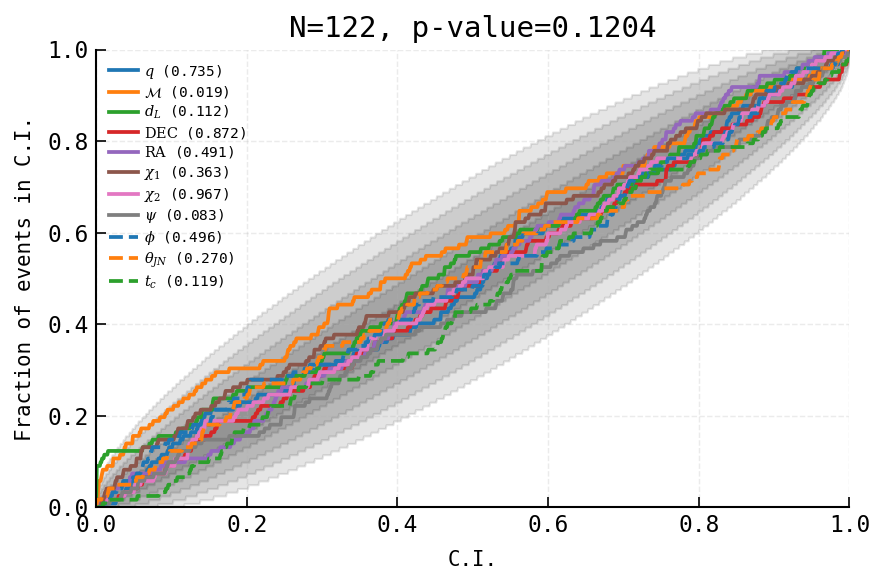

In [132]:
%%time 
bilby.core.result.make_pp_plot(allEvents_u, filename='pp_u_aligned.png',confidence_interval=[0.68,0.95,0.997,0.999936, 	0.999999426])

In [36]:
postMeansDiff = []
postMediansDiff = []
postMedian = []
postMean = []

for event in allEvents:
    try:
        event.posterior.drop("waveform_approximant",axis=1,inplace=True)
    except:
        pass
    try:
        event.injection_parameters.pop("waveform_approximant")
    except:
        pass
    posteriorResults = event.posterior.astype(np.float64) # Posterior results for one event
    posteriorMean,posteriorMedian = posteriorResults.mean(),posteriorResults.median()
    injectionParams = pd.Series(event.injection_parameters,dtype=np.float64)
    diffDF = posteriorResults - injectionParams
    meaningfulCols = getMeaningfulColumns(diffDF)
    postMeansDiff.append(posteriorMean - injectionParams)
    postMediansDiff.append(posteriorMedian - injectionParams)
    postMedian.append(posteriorMedian)
    postMean.append(posteriorMean)
    # fig,axs = makePostInjDiffPlot(meaningfulCols,diffDF,event)

/opt/desc/py/lib/python3.12/site-packages/pandas/core/dtypes/astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/opt/desc/py/lib/python3.12/site-packages/pandas/core/construction.py:817: ComplexWarning: Casting complex values to real discards the imaginary part
  subarr = np.asarray(arr, dtype=dtype)
/opt/desc/py/lib/python3.12/site-packages/pandas/core/dtypes/astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/opt/desc/py/lib/python3.12/site-packages/pandas/core/construction.py:817: ComplexWarning: Casting complex values to real discards the imaginary part
  subarr = np.asarray(arr, dtype=dtype)
/opt/desc/py/lib/python3.12/site-packages/pandas/core/dtypes/astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/opt/desc/py/lib/python3.12/site-packages/pandas/core

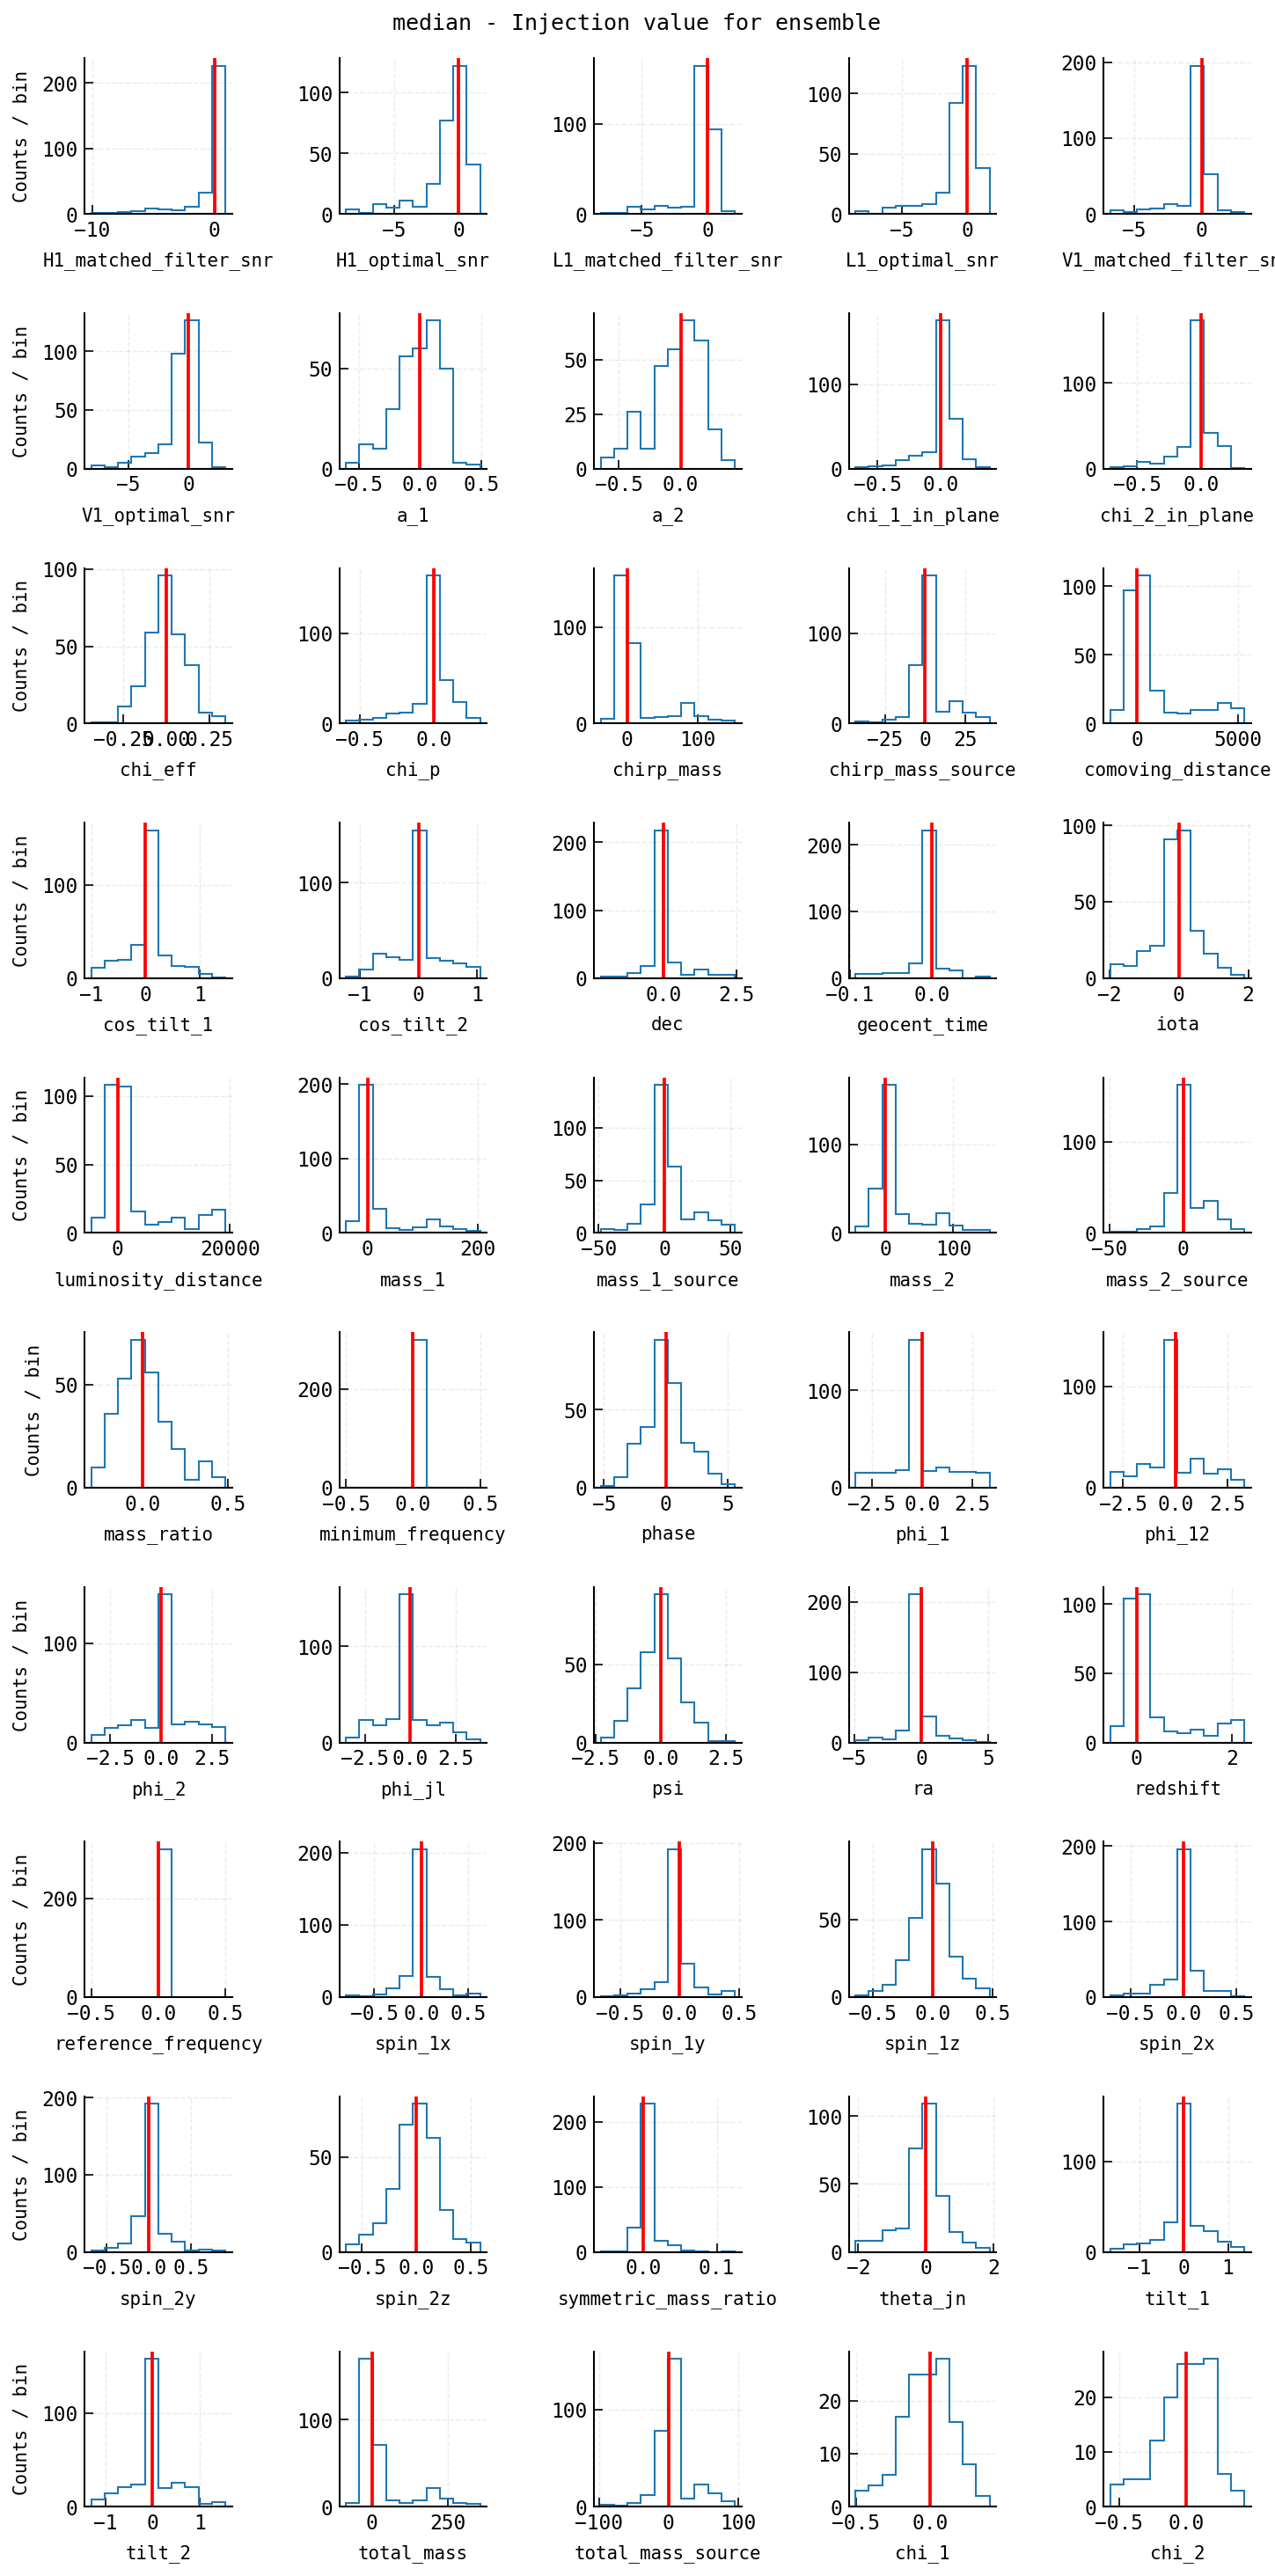

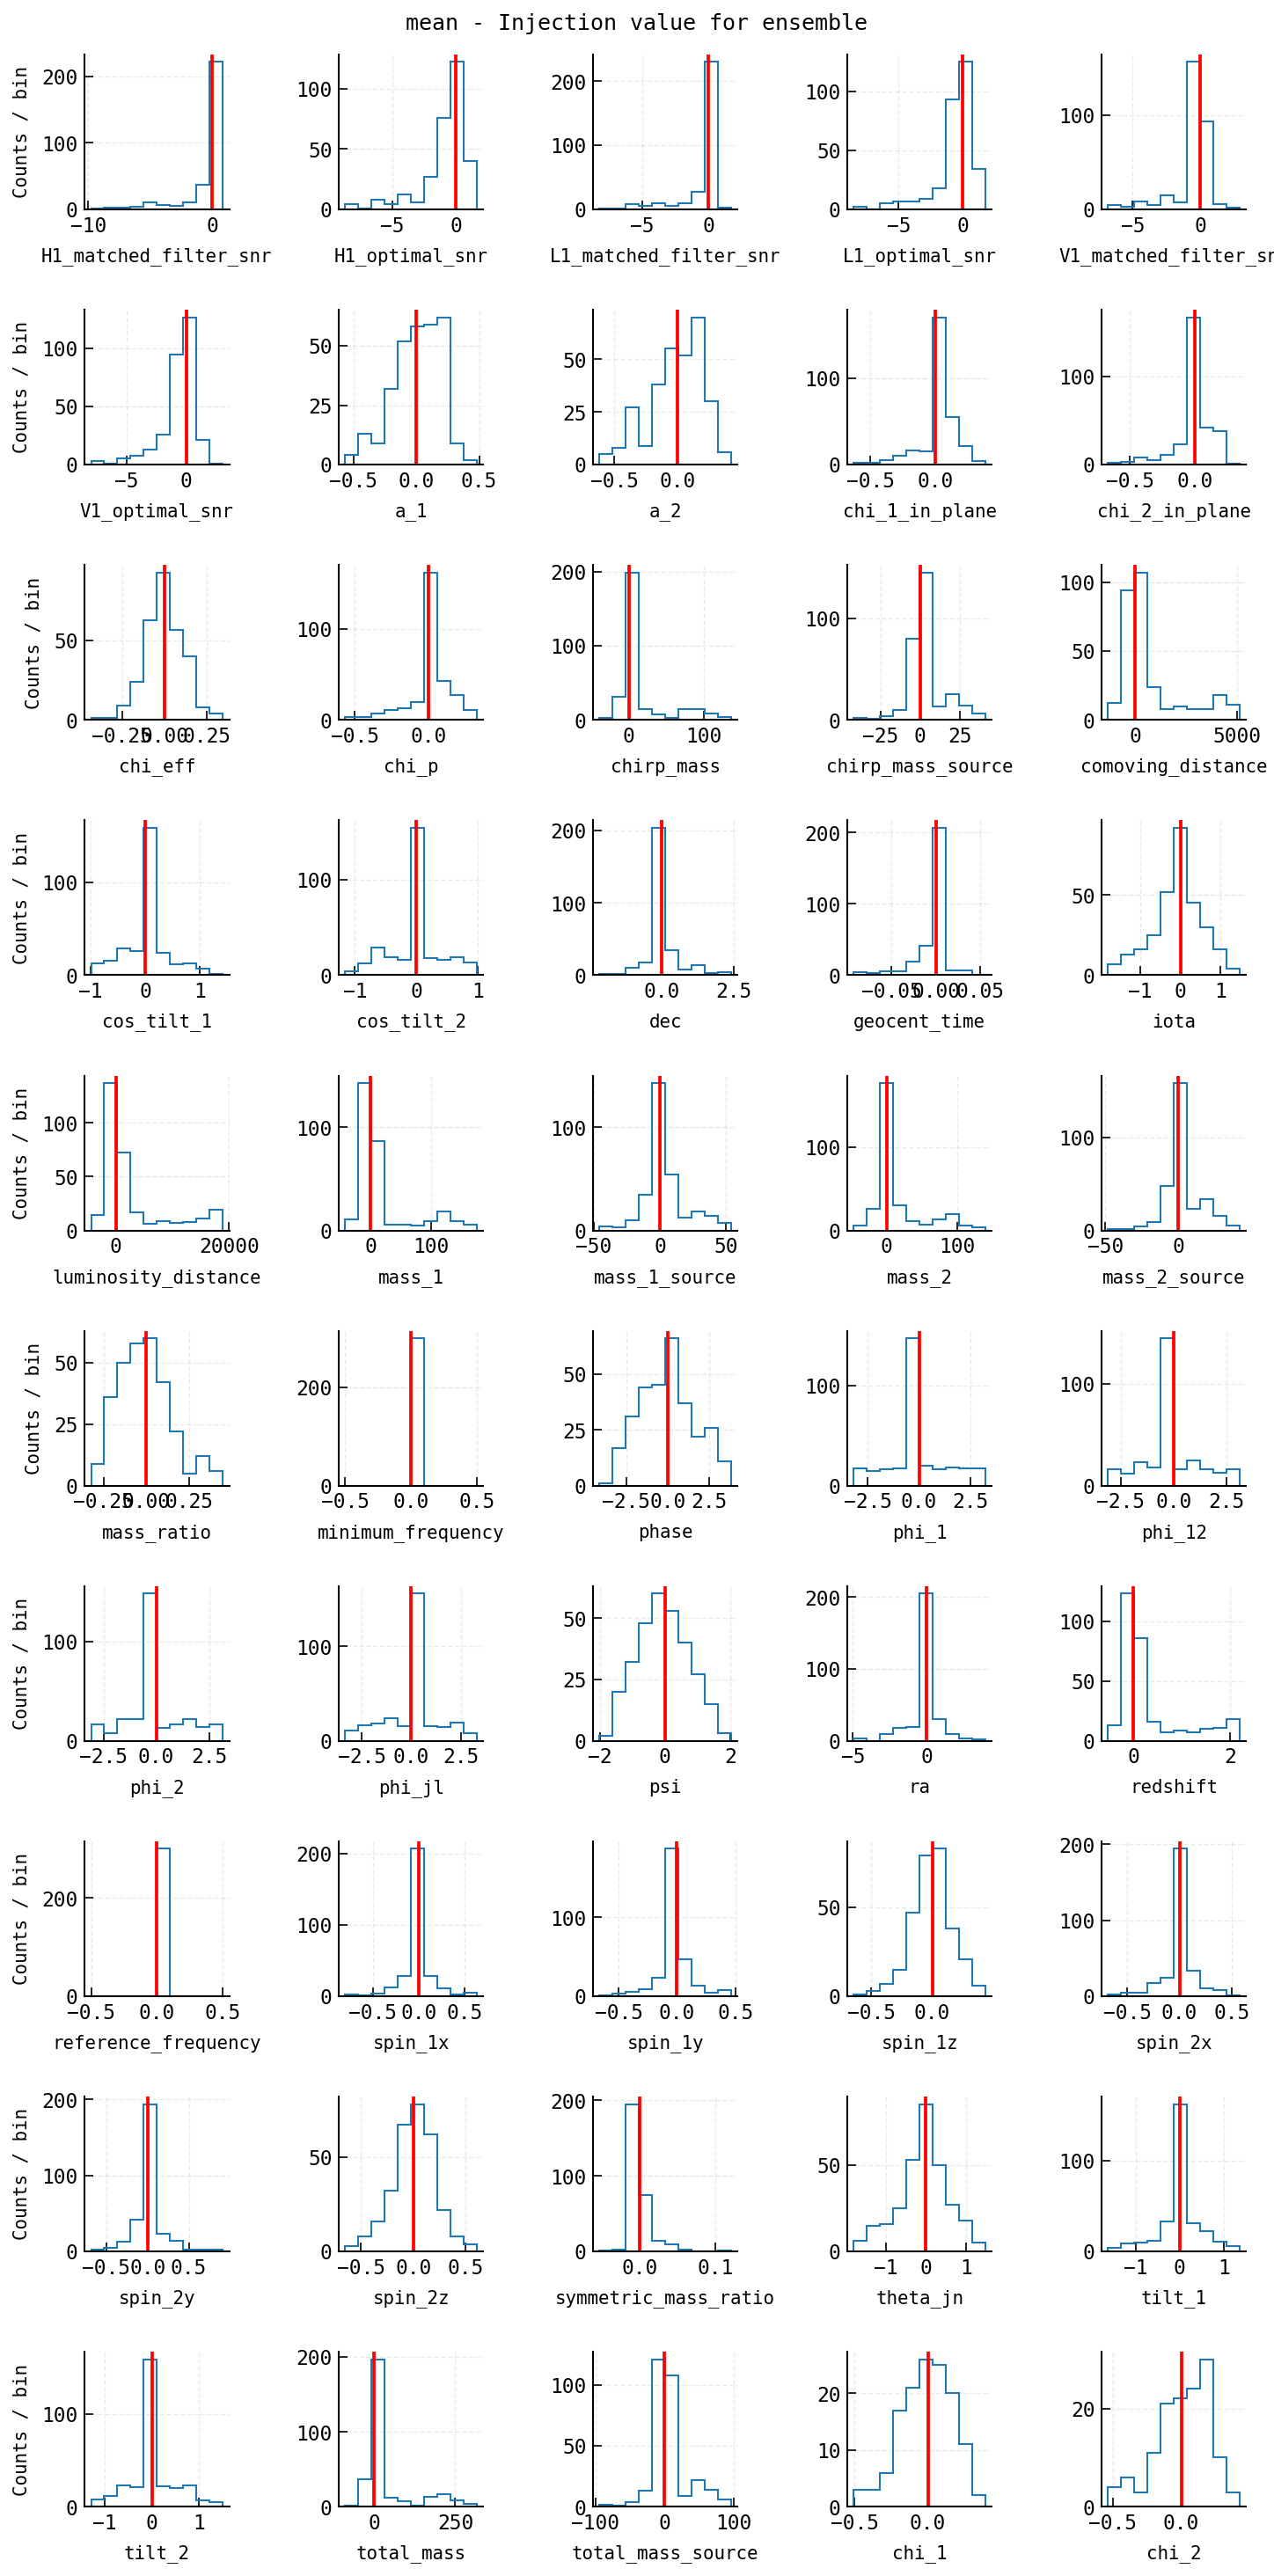

In [12]:
postMeanDiffDF = pd.DataFrame(postMeansDiff)
postMedianDiffDF = pd.DataFrame(postMediansDiff)
for df,meas in zip([postMedianDiffDF,postMeanDiffDF],["median","mean"]):
    myCols = getMeaningfulColumns(df)
    fig,axs = makePostInjDiffPlot(myCols,df,meas)

In [13]:
postMedianDiffDF.columns.values

array(['H1_log_likelihood', 'H1_matched_filter_snr', 'H1_optimal_snr',
       'L1_log_likelihood', 'L1_matched_filter_snr', 'L1_optimal_snr',
       'V1_log_likelihood', 'V1_matched_filter_snr', 'V1_optimal_snr',
       'a_1', 'a_2', 'chi_1_in_plane', 'chi_2_in_plane', 'chi_eff',
       'chi_p', 'chirp_mass', 'chirp_mass_source', 'comoving_distance',
       'cos_tilt_1', 'cos_tilt_2', 'dec', 'geocent_time', 'iota',
       'log_likelihood', 'log_prior', 'luminosity_distance', 'mass_1',
       'mass_1_source', 'mass_2', 'mass_2_source', 'mass_ratio',
       'minimum_frequency', 'phase', 'phi_1', 'phi_12', 'phi_2', 'phi_jl',
       'psi', 'ra', 'redshift', 'reference_frequency', 'spin_1x',
       'spin_1y', 'spin_1z', 'spin_2x', 'spin_2y', 'spin_2z',
       'symmetric_mass_ratio', 'theta_jn', 'tilt_1', 'tilt_2',
       'total_mass', 'total_mass_source', 'chi_1', 'chi_2'], dtype=object)

In [14]:
cols = ['a_1', 'a_2','chirp_mass','dec','ra','luminosity_distance','mass_1','mass_2',"mass_ratio"]

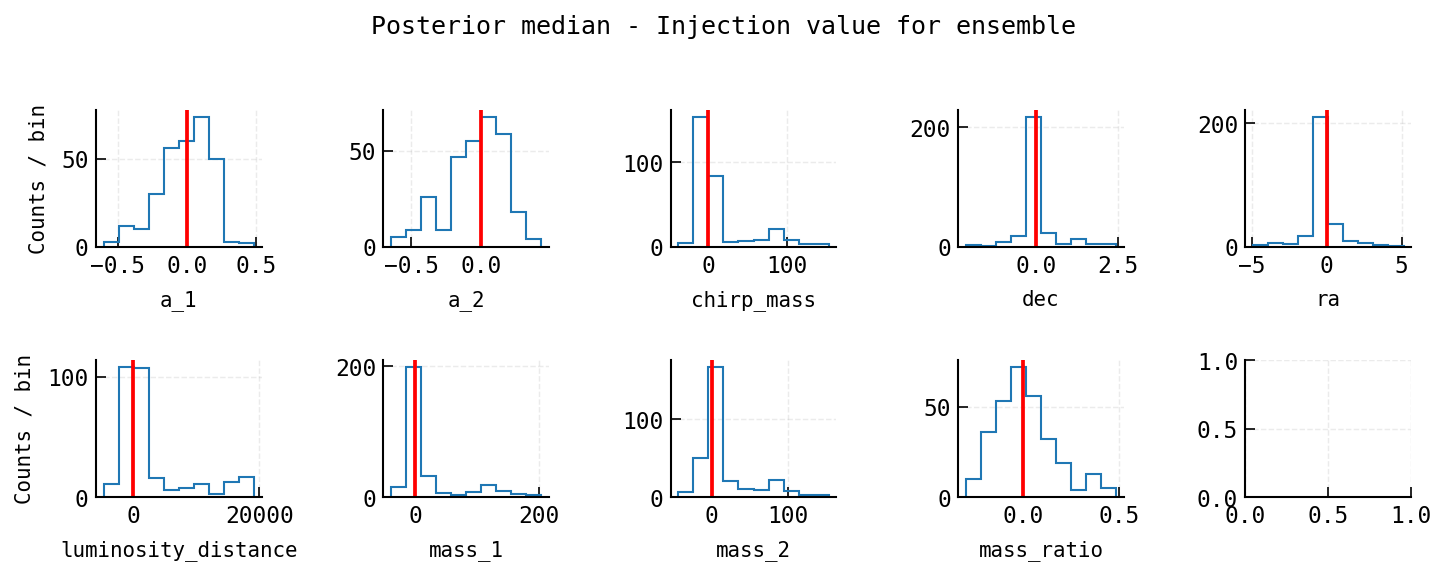

In [15]:
fig,axs = makePostInjDiffPlot(cols,postMedianDiffDF,"Posterior median")

In [16]:
pd.DataFrame(postMean)

,H1_log_likelihood,H1_matched_filter_snr,H1_optimal_snr,L1_log_likelihood,L1_matched_filter_snr,L1_optimal_snr,V1_log_likelihood,V1_matched_filter_snr,V1_optimal_snr,a_1,...,spin_2y,spin_2z,symmetric_mass_ratio,theta_jn,tilt_1,tilt_2,total_mass,total_mass_source,chi_1,chi_2
0,126.178590,15.916332,16.580126,103.598429,14.427421,13.657366,7.537303,4.086369,2.897992,0.185373,...,-0.004256,0.069182,0.246124,0.940811,1.214373,1.248729,19.048455,16.447120,NaN,NaN
1,52.383893,10.283735,9.597855,40.309319,9.009422,9.367434,25.123676,7.128029,7.153409,0.483162,...,0.000000,0.385707,0.245443,1.381142,0.000000,0.000000,246.163007,123.846592,0.483162,0.385707
2,110.362520,14.904011,13.990025,155.263002,17.738108,19.638528,249.971685,22.414096,21.106034,0.618441,...,0.000000,0.390444,0.235245,2.618232,0.000000,0.000000,220.995672,149.613924,0.618441,0.390444
3,16.517600,5.804905,6.190628,14.570808,5.454816,4.986781,28.984152,7.659173,7.262120,0.322256,...,0.000775,0.035905,0.237813,0.712207,1.318524,1.459729,244.621791,130.896140,NaN,NaN
4,27.336155,7.527518,6.309148,11.647718,4.877411,5.171952,7.000098,3.852527,4.636782,0.196119,...,0.000000,0.229684,0.245292,1.069923,0.000000,0.000000,151.813809,85.717304,0.196119,0.229684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.670181,1.254526,1.703991,1.488005,1.706672,1.588228,7.949046,3.773918,3.208705,0.300659,...,0.000000,0.326165,0.237970,1.817139,0.000000,0.000000,173.744731,67.234430,0.300659,0.326165
296,31.383148,8.079986,6.620811,18.724842,6.264431,7.401641,6.994572,3.741212,3.593351,0.528707,...,0.000000,0.444183,0.243032,2.452769,0.000000,0.000000,132.601312,63.411467,0.528707,0.444183
297,74.728860,12.309667,11.012401,71.997270,12.080109,13.252603,19.497895,6.313391,5.508616,0.281948,...,-0.019868,0.077943,0.242224,0.733684,1.143720,1.328904,76.632247,54.643240,NaN,NaN
298,4.541458,3.084735,2.474245,0.376437,1.194916,1.869839,17.089257,5.920721,5.478273,0.315401,...,0.002072,0.072922,0.242430,1.397411,1.232795,1.353459,118.682678,65.382114,NaN,NaN
